In [1]:
!pip install Bio 

     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 2.3MB 11.3MB/s 


In [2]:
from Bio import SeqIO
cancer = SeqIO.read("/content/cancer_analisis.fasta","fasta")

In [3]:
cancer

SeqRecord(seq=Seq('MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWF...DSD'), id='sp|P04637.4|P53_HUMAN', name='sp|P04637.4|P53_HUMAN', description='sp|P04637.4|P53_HUMAN RecName: Full=Cellular tumor antigen p53; AltName: Full=Antigen NY-CO-13; AltName: Full=Phosphoprotein p53; AltName: Full=Tumor suppressor p53', dbxrefs=[])

In [4]:
cancer_seq = cancer.seq

In [5]:
print("cancer_seq ::",len(cancer_seq))

cancer_seq :: 393


In [ ]:
#Compruebe el contenido de GC / cuál de ellos es más estable al calor

In [6]:
from Bio.SeqUtils import GC

In [9]:
print("GC contenido de cancer_seq ::",GC(cancer_seq))

GC contenido de cancer_seq :: 18.06615776081425


In [12]:
#recuento de aminoacidos
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [14]:
cancer_protein = SeqIO.read("/content/cancer_analisis.fasta","fasta") 

In [15]:
cancer_analysed = ProteinAnalysis(str(cancer_protein))

In [19]:
print(cancer_analysed)
cancer_analysed = ProteinAnalysis(str(cancer_protein))

In [24]:
cancer_analysed.count_amino_acids()

{'A': 8,
 'C': 2,
 'D': 10,
 'E': 6,
 'F': 6,
 'G': 0,
 'H': 3,
 'I': 2,
 'K': 1,
 'L': 8,
 'M': 6,
 'N': 12,
 'P': 15,
 'Q': 4,
 'R': 1,
 'S': 9,
 'T': 2,
 'V': 2,
 'W': 2,
 'Y': 1}

In [26]:
#frecuencia de aminoacidos
from collections import Counter

In [27]:
cancer_freq = Counter(cancer_protein)

In [28]:
cancer_freq

Counter({'A': 24,
         'C': 10,
         'D': 20,
         'E': 30,
         'F': 11,
         'G': 23,
         'H': 12,
         'I': 8,
         'K': 20,
         'L': 32,
         'M': 12,
         'N': 14,
         'P': 45,
         'Q': 15,
         'R': 26,
         'S': 38,
         'T': 22,
         'V': 18,
         'W': 4,
         'Y': 9})

In [30]:
Counter(cancer_protein).most_common(10)
#Aminoácido más común en Cancer

[('P', 45),
 ('S', 38),
 ('L', 32),
 ('E', 30),
 ('R', 26),
 ('A', 24),
 ('G', 23),
 ('T', 22),
 ('D', 20),
 ('K', 20)]

In [31]:
import numpy as np
import matplotlib.pyplot as plt

<BarContainer object of 20 artists>

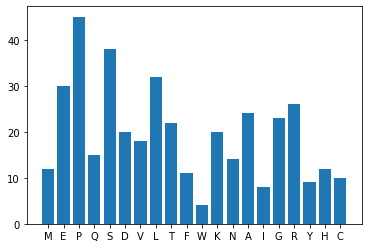

In [33]:
plt.bar(cancer_freq.keys(), cancer_freq.values())
#grafico de aminoacidos del cancer

In [42]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

alignments = pairwise2.align.globalxx(cancer_seq,cancer_protein)

print(alignments)
[('ACTCGA', 'A--C--', 2.0, 0, 6), ('ACTCGA', 'AC----', 2.0, 0, 6)]

# To See it well
print(format_alignment(*alignments[0]))
#podemos identificar el antigen tumor en p53

[Alignment(seqA='MEEPQS-DPSVEP-----PLSQETFSDLWKLL--------PE-------N-NVLS--------PL--------PSQAMDDL-----MLSPDDIEQWFTE---DPG---------------PDEA--------PR-----MPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGF--RLG--------FLHSGTAKSVT----CTYSP---------------------------AL--NKM-----FCQL----AKT----------CPVQLWVDSTPPPGTRVR------AM---------------------------------AIYKQ--------------------------------------------------------SQH----MTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLD-DRNTFRH-SVVVPYEPPEVG-SDCT--TIHYNYMCNS-SCMGGMNRRPILTIITLEDSSGNL--LGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHE---LPPGSTKRA-LPNNTSSSPQPKKKPL--DGEYFT-LQIRGRERFEMFRELNEALELK--DAQAGK--EPGGSRAHSSHLKSKKGQSTSRHKKLM-FKTEGP---DSD--', seqB="------ID-----: sp|P-------------04637.4|P-53_HUMAN\nN---ame: sp|P-04637.4|P-------53_HUM------------AN\nD--escription: sp|P---04637.4|P-53_HUM---------------------A---------------------N R--ecName: F----------ull=C----ellular tumor antigen p53; A-ltN--ame: F---ull=A--ntigen NY-C-----------------O-13; A-ltName: Full=Phos

In [44]:
print(format_alignment(*alignments[2]))

MEEPQSDPSVEP-----PLSQETFSDLWKLL--------PE-------N-NVLS--------PL--------PSQAMDDL-----MLSPDDIEQWFTE---DPG---------------PDEA--------PR-----MPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGF--RLG--------FLHSGTAKSVT----CTYSP---------------------------AL--NKM-----FCQL----AKT----------CPVQLWVDSTPPPGTRVR------AM---------------------------------AIYKQ--------------------------------------------------------SQH----MTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLD-DRNTFRH-SVVVPYEPPEVG-SDCT--TIHYNYMCNS-SCMGGMNRRPILTIITLEDSSGNL--LGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHE---LPPGSTKRA-LPNNTSSSPQPKKKPL--DGEYFT-LQIRGRERFEMFRELNEALELK--DAQAGK--EPGGSRAHSSHLKSKKGQSTSRHKKLM-FKTEGP---DSD--
    . |          |                     |        | |           |         |            |               |                 |           |      |                     |                       |          |              |                               |   |       |       |           ||                  |    |                                  |            

In [45]:
for a in alignments:
    print(format_alignment(*a))
    #usamos un loop para visualizr todos los datos

MEEPQS-DPSVEP-----PLSQETFSDLWKLL--------PE-------N-NVLS--------PL--------PSQAMDDL-----MLSPDDIEQWFTE---DPG---------------PDEA--------PR-----MPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGF--RLG--------FLHSGTAKSVT----CTYSP---------------------------AL--NKM-----FCQL----AKT----------CPVQLWVDSTPPPGTRVR------AM---------------------------------AIYKQ--------------------------------------------------------SQH----MTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLD-DRNTFRH-SVVVPYEPPEVG-SDCT--TIHYNYMCNS-SCMGGMNRRPILTIITLEDSSGNL--LGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHE---LPPGSTKRA-LPNNTSSSPQPKKKPL--DGEYFT-LQIRGRERFEMFRELNEALELK--DAQAGK--EPGGSRAHSSHLKSKKGQSTSRHKKLM-FKTEGP---DSD--
       |          |                     |        | |           |         |            |               |                 |           |      |                     |                       |          |              |                               |   |       |       |           ||                  |    |                                  |          

In [47]:
alignments2 = pairwise2.align.globalxx(cancer_seq,cancer_protein,one_alignment_only=True,score_only=True)

In [49]:
alignments2
#El escore de una proteína refleja su contenido en aminoácidos (AA) en comparación con la proteína ideal.
# Sin embargo, cuando se necesita conocer la utilización de los AA en el organismo es necesario realizar 
#la corrección del valor de escore según la digestibilidad proteica (PDCAAS).
#en este caso el score es de 61

61.0

In [53]:
alignments2/len(cancer_seq)*100
#porcentaje de similitud fracción de nucleótidos del cancer

15.521628498727736

In [64]:
def delta(x,y):
    return 0 if x == y else 1


def M(cancer_seq,cancer_protein,i,j,k):
    return sum(delta(x,y) for x,y in zip(cancer_seq[i:i+k],seq2[j:j+k]))


def makeMatrix(cancer_seq,cancer_protein,k):
    n = len(cancer_seq)
    m = len(cancer_protein)
    return [[M(cancer_seq,cancer_protein,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, cancer_seq, cancer_protein, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + cancer_protein)
    print('-'*(2 + len(cancer_protein)))
    for label,row in zip(cancer_seq,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(cancer_seq,cancer_protein,k=1,t=1):
    M = makeMatrix(cancer_seq,cancer_protein,k)
    plotMatrix(M, t, cancer_seq,cancer_protein) #experiment with character choice

In [66]:
print(dotplot)

<function dotplot at 0x7f1ccf3f3830>
